# Progress Report

### GitHub Repository: 
https://github.com/chi-city/CS418-Group-Project

### Group members:
Alex Castillo, Zaid Awaidah, Zohaib Akram, Peter Rantisi, Joel Christian

## Product introduction:

The urban landscape of major cities in the United States is marked by the coexistence of diversity and challenges.

Among these challenges, crime is an issue of major importance because it directly impacts the safety and well-being of locals and visitors.

What we aim to do with this project is study, analyze, and compare crime data from the year 2022 in two major cities in the US - Chicago and Los Angeles.

Our goal is to identify patterns and trends within the datasets to aid in crime prevention and intervention, particularly in the context of public transportation.

**The Problem:**

Cities like Chicago and Los Angeles are diverse, thriving communities with complex dynamics.

The lack of comprehenseive, comparative analysis of crime data across both cities poses a significant threat to the locals.

Our project aims to address this void by analyzing crime data in these two major cities in order to uncover the intricate web of criminal activies around public transportation.

Our investigation hinges on understanding the nature, frequency, and geographical distribution of crimes in order to devise effective policies and law enforcement strategies.

Plus, we seek to identify how varying levels of public transportation infrastructure influences the type and frequency of crimes with the served areas.

**Key Research Questions:**

The questions we seek to answer:

1. What types of crimes dominate each city, and how do these patterns change within the vicinity of public transit services?

2. How does the frequency of different crimes fluctuate throughout the year in these cities?

3. Are specific neighborhoods or districts more susceptible to certain types of crimes? How extensive is the reach of public transportation within these areas?

4. Is there a correlation between crime prevalence and the level of public transit ridership?

5. To what extent does public transit frequency correlate with crime rates in particular areas?

**Project Significance:**

This project provides a data-driven perspective on crime in the two major cities.

This can lead to more informed discussions about public safety, law enforcement, and community development.

**Reasons For Choosing This Project:**

Even though crime rates in Chicago have decreased, their prevalence is still felt each year.

With UIC being a commuter school, many students rely on public transit to get to and from campus, and thus, addressing crime in areas served by public transportation is of paramount importance to student safety.

**The Hypothesis:**

We hypothesize that the data will reveal significant disparities in the types and frequencies of crimes between Chicago and Los Angeles.

We attribute these differences to a variety of factors, including population density, socio-economic conditions, law enforcement practices, climatic variations, and the quality of public transportation infrastructure in each city.

We aim to substantiate these hypothesis with empirical evidence and, in doing so, make significant contributions to the fields of urban studies, law enforcement, and public safety.



## Any changes since the proposal:

**Not much has changed about the scope of our project. What we discussed during the proposal is what we plan to cover in our project.**

## Data:


For data preparation, we followed a systematic approach. Firstly, we obtained comprehensive crime data directly from the official websites of the City of Chicago and Los Angeles in the form of CSV files.
These datasets contain crucial details such as the date of each crime, a unique crime code specific to each city, information on whether an arrest was made, and the precise geographic coordinates (latitude and longitude) of each crime occurrence.

To manage the substantial volume of data and ensure relevance to our analysis, we narrowed our focus to crimes that occurred exclusively in the year 2022.

Additionally, we obtained public transportation datasets from public sources. Leveraging the geographic coordinates of public transit stops, we utilize distance algorithms to identify whether a crime occurred within the close proximity of areas served by public transportation. This comprehensive data preparation process serves as a crucial foundation for our subsequent analytical and machine learning tasks.

## Exploratory data analysis:

Currently, our data is broken up into multiple CSV files.

We have two crime datasets, one for Chicago and one for LA which have been filtered down to only include data from the year 2022. We have left everything else in the dataset alone, as we want to maintain the flexibility of potentially investigiating the how other factors may influence crime. We do drop any empty rows from our Pandas DataFrame at runtime that have empty values for "Latitude" and "Longitude" as this is an essential component to our anaylsis.

Additionally, we have CSV files for both Chicago and LA which contain the stations and their coordinates along train/rail routes (we are currently not planning on investigating bus routes). We also have the ridership data for each line, however, only for Chicago do we have the individual station ridsership counts. We do not have this data for Los Angeles as they seem to only provide the ridership of the entire line.


## Visualizations:

In [1]:
# Initial code to run:
import pandas as pd
import matplotlib.pyplot as plt
import math as m
from datetime import datetime


# Returns the distance in miles between two coordinates
# Distance function source: https://stackoverflow.com/a/41337005
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = (0.5 - m.cos((lat2 - lat1) * p) / 2 + m.cos(lat1 * p) * m.cos(lat2 * p) * (1 - m.cos((lon2 - lon1) * p)) / 2)
    return (12742 * m.asin(m.sqrt(a)))


# Using the provided latitude, longitude, Chicago crime data, and distance
# This function gets all nearby crime, seperating it by month
def get_crime_nearby_chicago(latitude, longitude, data, dist):
    counter = 0
    all_results = {}

    for i in range(0, len(data)):
        # First check if the current crime is within the radius
        if distance(latitude, longitude, data.iloc[i]["Latitude"], data.iloc[i]["Longitude"]) <= dist:
            try:
                crime_month = datetime.strptime(data.iloc[i]["Date"], "%m/%d/%y %H:%M")
            except ValueError:
                crime_month = datetime.strptime(data.iloc[i]["Date"], "%m/%d/%Y %H:%M")
            crime_month = crime_month.month
            crime_type = data.iloc[i]["Primary Type"]

            if crime_type not in all_results:
                all_results[crime_type] = {}
            
            if crime_month not in all_results[crime_type]:
                all_results[crime_type][crime_month] = 0
            
            all_results[crime_type][crime_month] += 1
            counter+=1

    print("Total crime found in specified radius: " + str(counter))

    all_results_data = {}
    all_crime_types = list(set(all_results.keys()))

    # Iterates over each crime type and month, and adds the count to a dictionary
    for crime_type in all_crime_types:
        for month in all_results[crime_type]:
            if month not in all_results_data:
                all_results_data[month] = {}
            all_results_data[month][crime_type] = all_results[crime_type][month]


    all_results_df = pd.DataFrame.from_dict(all_results_data, orient='index') 

    # Set all blank spaces to 0
    all_results_df.fillna(value=0, inplace=True)

    return all_results_df

# Using the provided latitude, longitude, Los Angeles crime data, and distance
# This function gets all nearby crime, seperating it by month
def get_crime_nearby_la(latitude, longitude, data, dist):
    counter = 0
    all_results = {}

    for i in range(0, len(data)):
        # First check if the current crime is within the radius
        if distance(latitude, longitude, data.iloc[i]["LAT"], data.iloc[i]["LON"]) <= dist:
            try:
                crime_month = datetime.strptime(data.iloc[i]["Date Rptd"], "%m/%d/%y %H:%M")
            except ValueError:
                crime_month = datetime.strptime(data.iloc[i]["Date Rptd"], "%m/%d/%Y %H:%M")
            crime_month = crime_month.month
            crime_type = data.iloc[i]["Crm Cd Desc"]

            if crime_type not in all_results:
                all_results[crime_type] = {}
            
            if crime_month not in all_results[crime_type]:
                all_results[crime_type][crime_month] = 0
            
            all_results[crime_type][crime_month] += 1
            counter+=1

    print("Total crime found in specified radius: " + str(counter))

    all_results_data = {}
    all_crime_types = list(set(all_results.keys()))

    # Iterates over each crime type and month, and adds the count to a dictionary
    for crime_type in all_crime_types:
        for month in all_results[crime_type]:
            if month not in all_results_data:
                all_results_data[month] = {}
            all_results_data[month][crime_type] = all_results[crime_type][month]


    all_results_df = pd.DataFrame.from_dict(all_results_data, orient='index') 

    # Set all blank spaces to 0
    all_results_df.fillna(value=0, inplace=True)

    return all_results_df

In [2]:
# More initial code
chicago_crime_file = "Chicago_2022_Crime_Data.csv"
chicago_crime_data = pd.read_csv(chicago_crime_file, usecols=["Date", "Latitude", "Longitude", "Arrest", "Primary Type"])
chicago_crime_data = chicago_crime_data.dropna(subset=["Latitude", "Longitude"])

chicago_cta_ridership_file = "Chicago_CTA_Ridership.csv"
chicago_cta_ridership_data = pd.read_csv(chicago_cta_ridership_file)
chicago_cta_ridership_data['station_id'] = chicago_cta_ridership_data['station_id'].astype(int)
chicago_cta_l_stops_file = "CTA_L-Stops_Chicago.csv"
chicago_cta_l_stops_data = pd.read_csv(chicago_cta_l_stops_file, usecols=['MAP_ID', 'Location'])
chicago_cta_l_stops_data['MAP_ID'] = chicago_cta_l_stops_data['MAP_ID'].astype(int)

la_crime_file = "Los_Angeles_Crime_2022.csv"
la_crime_data = pd.read_csv(la_crime_file, usecols=["Date Rptd", "Crm Cd", "Crm Cd Desc", "LAT", "LON"])
la_crime_data = la_crime_data.dropna(subset=["LAT", "LON"])

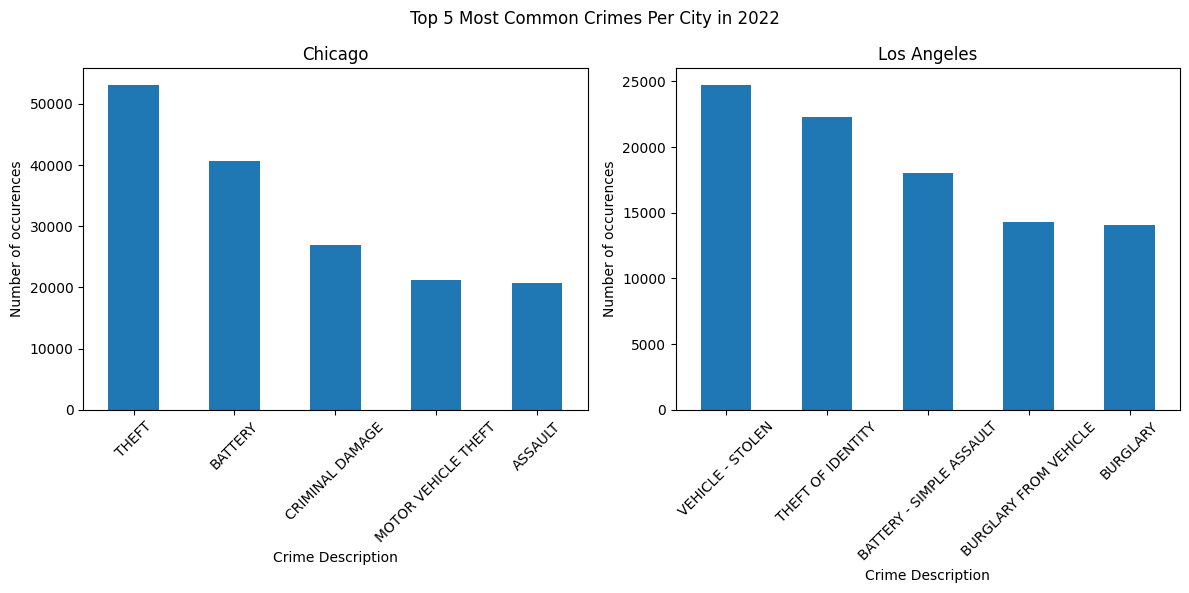

In [3]:
# First visulization: comparing the top five OVERALL most popular types of crime in Chicago and LA (Alex Castillo)
most_frequent_chicago_crimes = chicago_crime_data['Primary Type'].value_counts().head(5)
most_frequest_la_crimes = la_crime_data["Crm Cd Desc"].value_counts().head(5)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
most_frequent_chicago_crimes.plot(kind="bar", ax=ax1)
ax1.set_title("Chicago")
ax1.set_xlabel("Crime Description")
ax1.set_ylabel("Number of occurences")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
most_frequest_la_crimes.plot(kind="bar", ax=ax2)
ax2.set_title("Los Angeles")
ax2.set_xlabel("Crime Description")
ax2.set_ylabel("Number of occurences")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.suptitle("Top 5 Most Common Crimes Per City in 2022")
plt.tight_layout()
plt.show()

Total crime found in specified radius: 1093
Total crime found in specified radius: 582
Total crime found in specified radius: 799
Total crime found in specified radius: 781


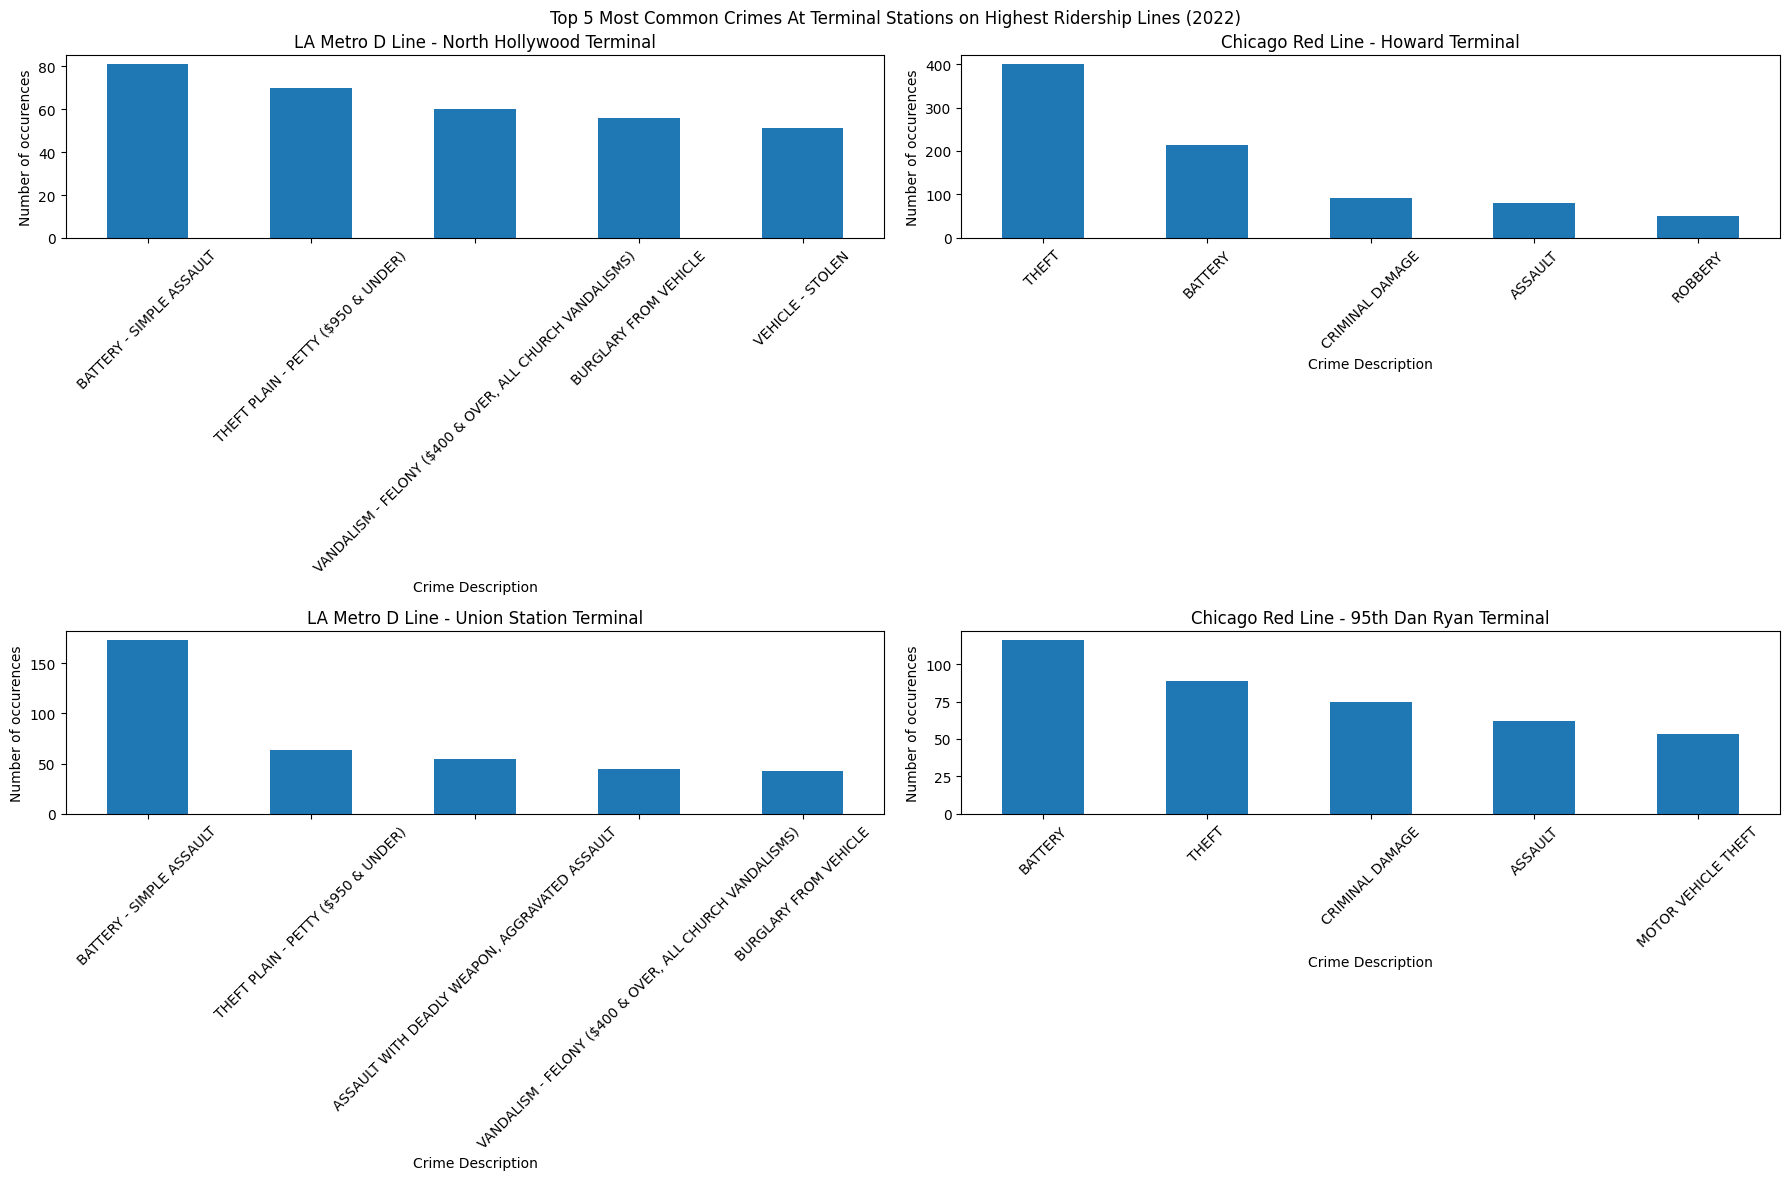

In [4]:
# Second visulization: comparing the five most popular types of crime near the terminus stations on the MOST popular lines for Chicago and LA (Alex Castillo)
chicago_red_line_howard = get_crime_nearby_chicago(42.019063, -87.672892, chicago_crime_data, 0.5).sum(axis=0).sort_values(ascending=False).head(5)
chicago_red_line_95th_dan_ryan = get_crime_nearby_chicago(41.722377, -87.624342, chicago_crime_data, 0.5).sum(axis=0).sort_values(ascending=False).head(5)
la_union_station = get_crime_nearby_la(34.056061, -118.234759, la_crime_data, 0.5).sum(axis=0).sort_values(ascending=False).head(5)
la_north_hollywood_station = get_crime_nearby_la(34.168504, -118.376808, la_crime_data, 0.5).sum(axis=0).sort_values(ascending=False).head(5)

fig, axes = plt.subplots(2,2, figsize=(18,12))
chicago_red_line_howard.plot(kind="bar", ax=axes[0, 1])
axes[0, 1].set_title("Chicago Red Line - Howard Terminal")
axes[0, 1].set_xlabel("Crime Description")
axes[0, 1].set_ylabel("Number of occurences")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
chicago_red_line_95th_dan_ryan.plot(kind="bar", ax=axes[1, 1])
axes[1, 1].set_title("Chicago Red Line - 95th Dan Ryan Terminal")
axes[1, 1].set_xlabel("Crime Description")
axes[1, 1].set_ylabel("Number of occurences")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

la_union_station.plot(kind="bar", ax=axes[1, 0])
axes[1, 0].set_title("LA Metro D Line - Union Station Terminal")
axes[1, 0].set_xlabel("Crime Description")
axes[1, 0].set_ylabel("Number of occurences")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
la_north_hollywood_station.plot(kind="bar", ax=axes[0, 0])
axes[0, 0].set_title("LA Metro D Line - North Hollywood Terminal")
axes[0, 0].set_xlabel("Crime Description")
axes[0, 0].set_ylabel("Number of occurences")
axes[0, 0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)

plt.suptitle("Top 5 Most Common Crimes At Terminal Stations on Highest Ridership Lines (2022)")
plt.tight_layout()
plt.show()

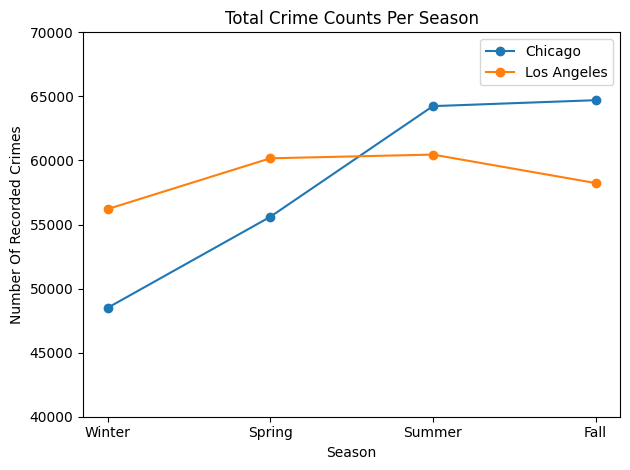

In [5]:
# Third visualization: comparing crime counts by season per city (Alex Castillo)
winter_months = [12, 1, 2]
spring_months = [3, 4, 5]
summer_months = [6, 7, 8]
fall_months = [9, 10, 11]

chicago_crime_data['Date'] = pd.to_datetime(chicago_crime_data['Date'], format='%m/%d/%Y %H:%M')
chicago_number_of_winter_crimes = chicago_crime_data['Date'].dt.month.isin(winter_months).sum()
chicago_number_of_spring_crimes = chicago_crime_data['Date'].dt.month.isin(spring_months).sum()
chicago_number_of_summer_crimes = chicago_crime_data['Date'].dt.month.isin(summer_months).sum()
chicago_number_of_fall_crimes = chicago_crime_data['Date'].dt.month.isin(fall_months).sum()
chicago_seasonal_crime_values = {
    "Winter": chicago_number_of_winter_crimes,
    "Spring": chicago_number_of_spring_crimes,
    "Summer": chicago_number_of_summer_crimes,
    "Fall": chicago_number_of_fall_crimes
}

la_crime_data['Date Rptd'] = pd.to_datetime(la_crime_data['Date Rptd'], format='%m/%d/%y %H:%M')
la_number_of_winter_crimes = la_crime_data['Date Rptd'].dt.month.isin(winter_months).sum()
la_number_of_spring_crimes = la_crime_data['Date Rptd'].dt.month.isin(spring_months).sum()
la_number_of_summer_crimes = la_crime_data['Date Rptd'].dt.month.isin(summer_months).sum()
la_number_of_fall_crimes = la_crime_data['Date Rptd'].dt.month.isin(fall_months).sum()
la_seasonal_crime_values = {
    "Winter": la_number_of_winter_crimes,
    "Spring": la_number_of_spring_crimes,
    "Summer": la_number_of_summer_crimes,
    "Fall": la_number_of_fall_crimes
}

plt.plot(list(chicago_seasonal_crime_values.keys()), list(chicago_seasonal_crime_values.values()), marker='o', label="Chicago")
plt.plot(list(la_seasonal_crime_values.keys()), list(la_seasonal_crime_values.values()), marker='o', label="Los Angeles")
plt.xlabel("Season")
plt.ylabel("Number Of Recorded Crimes")
plt.legend()
plt.title("Total Crime Counts Per Season")
plt.ylim(40000, 70000)
plt.tight_layout()
plt.show()

In [6]:
# Fourth visualization: comparing crime counts by season near the terminus stations on the MOST popular lines for Chicago and LA (Alex Castillo)
chicago_crime_data = pd.read_csv(chicago_crime_file, usecols=["Date", "Latitude", "Longitude", "Arrest", "Primary Type"])
chicago_crime_data = chicago_crime_data.dropna(subset=["Latitude", "Longitude"])
la_crime_data = pd.read_csv(la_crime_file, usecols=["Date Rptd", "Crm Cd", "Crm Cd Desc", "LAT", "LON"])
la_crime_data = la_crime_data.dropna(subset=["LAT", "LON"])

chicago_red_line_howard = get_crime_nearby_chicago(42.019063, -87.672892, chicago_crime_data, 0.5)
chicago_red_line_howard = chicago_red_line_howard.sort_index()
chicago_red_line_howard_winter_crime_count = chicago_red_line_howard.loc[12].sum() +  chicago_red_line_howard.loc[1].sum() +  chicago_red_line_howard.loc[2].sum()
chicago_red_line_howard_spring_crime_count = chicago_red_line_howard.loc[3].sum() +  chicago_red_line_howard.loc[4].sum() +  chicago_red_line_howard.loc[5].sum()
chicago_red_line_howard_summer_crime_count = chicago_red_line_howard.loc[6].sum() +  chicago_red_line_howard.loc[7].sum() +  chicago_red_line_howard.loc[8].sum()
chicago_red_line_howard_fall_crime_count = chicago_red_line_howard.loc[9].sum() +  chicago_red_line_howard.loc[10].sum() +  chicago_red_line_howard.loc[11].sum()
chicago_red_line_howard_seasonal_crime_values = {
    "Winter": chicago_red_line_howard_winter_crime_count,
    "Spring": chicago_red_line_howard_spring_crime_count,
    "Summer": chicago_red_line_howard_summer_crime_count,
    "Fall": chicago_red_line_howard_fall_crime_count
}

chicago_red_line_95th_dan_ryan = get_crime_nearby_chicago(41.722377, -87.624342, chicago_crime_data, 0.5)
chicago_red_line_95th_dan_ryan = chicago_red_line_95th_dan_ryan.sort_index()
chicago_red_line_95th_dan_ryan_winter_crime_count = chicago_red_line_95th_dan_ryan.loc[12].sum() +  chicago_red_line_95th_dan_ryan.loc[1].sum() +  chicago_red_line_95th_dan_ryan.loc[2].sum()
chicago_red_line_95th_dan_ryan_spring_crime_count = chicago_red_line_95th_dan_ryan.loc[3].sum() +  chicago_red_line_95th_dan_ryan.loc[4].sum() +  chicago_red_line_95th_dan_ryan.loc[5].sum()
chicago_red_line_95th_dan_ryan_summer_crime_count = chicago_red_line_95th_dan_ryan.loc[6].sum() +  chicago_red_line_95th_dan_ryan.loc[7].sum() +  chicago_red_line_95th_dan_ryan.loc[8].sum()
chicago_red_line_95th_dan_ryan_fall_crime_count = chicago_red_line_95th_dan_ryan.loc[9].sum() +  chicago_red_line_95th_dan_ryan.loc[10].sum() +  chicago_red_line_95th_dan_ryan.loc[11].sum()
chicago_red_line_95th_dan_ryan_seasonal_crime_values = {
    "Winter": chicago_red_line_95th_dan_ryan_winter_crime_count,
    "Spring": chicago_red_line_95th_dan_ryan_spring_crime_count,
    "Summer": chicago_red_line_95th_dan_ryan_summer_crime_count,
    "Fall": chicago_red_line_95th_dan_ryan_fall_crime_count
}

la_union_station = get_crime_nearby_la(34.056061, -118.234759, la_crime_data, 0.5)
la_union_station = la_union_station.sort_index()
la_union_station_winter_crime_count = la_union_station.loc[12].sum() +  la_union_station.loc[1].sum() +  la_union_station.loc[2].sum()
la_union_station_spring_crime_count = la_union_station.loc[3].sum() +  la_union_station.loc[4].sum() +  la_union_station.loc[5].sum()
la_union_station_summer_crime_count = la_union_station.loc[6].sum() +  la_union_station.loc[7].sum() +  la_union_station.loc[8].sum()
la_union_station_fall_crime_count = la_union_station.loc[9].sum() +  la_union_station.loc[10].sum() +  la_union_station.loc[11].sum()
la_line_d_union_station_seasonal_crime_values = {
    "Winter": la_union_station_winter_crime_count,
    "Spring": la_union_station_spring_crime_count,
    "Summer": la_union_station_summer_crime_count,
    "Fall": la_union_station_fall_crime_count
}

la_north_hollywood_station = get_crime_nearby_la(34.168504, -118.376808, la_crime_data, 0.5)
la_north_hollywood_station = la_north_hollywood_station.sort_index()
la_north_hollywood_station_winter_crime_count = la_north_hollywood_station.loc[12].sum() +  la_north_hollywood_station.loc[1].sum() +  la_north_hollywood_station.loc[2].sum()
la_north_hollywood_station_spring_crime_count = la_north_hollywood_station.loc[3].sum() +  la_north_hollywood_station.loc[4].sum() +  la_north_hollywood_station.loc[5].sum()
la_north_hollywood_station_summer_crime_count = la_north_hollywood_station.loc[6].sum() +  la_north_hollywood_station.loc[7].sum() +  la_north_hollywood_station.loc[8].sum()
la_north_hollywood_station_fall_crime_count = la_north_hollywood_station.loc[9].sum() +  la_north_hollywood_station.loc[10].sum() +  la_north_hollywood_station.loc[11].sum()
la_line_d_north_hollywood_station_seasonal_crime_values = {
    "Winter": la_north_hollywood_station_winter_crime_count,
    "Spring": la_north_hollywood_station_spring_crime_count,
    "Summer": la_north_hollywood_station_summer_crime_count,
    "Fall": la_north_hollywood_station_fall_crime_count
}

plt.plot(list(chicago_red_line_howard_seasonal_crime_values.keys()), list(chicago_red_line_howard_seasonal_crime_values.values()), marker='o', label="Chicago - Red Line - Howard Station")
plt.plot(list(chicago_red_line_95th_dan_ryan_seasonal_crime_values.keys()), list(chicago_red_line_95th_dan_ryan_seasonal_crime_values.values()), marker='o', label="Chicago - Red Line - 95th Dan Ryan Station")
plt.plot(list(la_line_d_union_station_seasonal_crime_values.keys()), list(la_line_d_union_station_seasonal_crime_values.values()), marker='o', label="Los Angeles - Line B - Union Station")
plt.plot(list(la_line_d_north_hollywood_station_seasonal_crime_values.keys()), list(la_line_d_north_hollywood_station_seasonal_crime_values.values()), marker='o', label="Los Angeles - Line B - North Hollywood Station")
plt.xlabel("Season")
plt.ylabel("Number Of Recorded Crimes")
plt.legend()
plt.title("Total Crime Counts Per Season Per Line (within 0.5 mile radius of station, 2022)")
plt.tight_layout()
plt.show()

Total crime found in specified radius: 1093


In [ ]:
# Fifth Visulization: busiest vs least busiest station top 5 crimes on Chicago CTA (Alex Castillo)
chicago_crime_data = pd.read_csv(chicago_crime_file, usecols=["Date", "Latitude", "Longitude", "Arrest", "Primary Type"])
chicago_crime_data = chicago_crime_data.dropna(subset=["Latitude", "Longitude"])
chicago_cta_busiest_station_crimes = get_crime_nearby_chicago(41.884809, -87.627813, chicago_crime_data, 0.5).sum(axis=0).sort_values(ascending=False).head(5)
chicago_cta_least_busiest_station_crimes = get_crime_nearby_chicago(41.78013, -87.615546, chicago_crime_data, 0.5).sum(axis=0).sort_values(ascending=False).head(5)
fig, axes = plt.subplots(1,2, figsize=(12,6))
chicago_cta_busiest_station_crimes.plot(kind="bar", ax=axes[0])
axes[0].set_title("CTA Red Line - Lake/State (Busiest Station)")
axes[0].set_xlabel("Crime Description")
axes[0].set_ylabel("Number of occurences")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
chicago_cta_least_busiest_station_crimes.plot(kind="bar", ax=axes[1])
axes[1].set_title("CTA Green Line - King Drive (Least Busiest Station)")
axes[1].set_xlabel("Crime Description")
axes[1].set_ylabel("Number of occurences")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
plt.suptitle("Top 5 Most Common Crimes Near the Busiest and Least Busiest Station on the CTA (0.5 mile radius, 2022)")
plt.tight_layout()
plt.show()

## ML analyses:

## Reflection:

- What is the most challenging part of the project that you’ve encountered so far?
    - RESPONSE HERE
<br><br>
- What are your initial insights?
    - RESPONSE HERE
<br><br>
- Are there any concrete results you can show at this point? If not, why not?
    - RESPONSE HERE
<br><br>
- Going forward, what are the current biggest problems you’re facing?
    - RESPONSE HERE
<br><br>
- Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
    - RESPONSE HERE
<br><br>
- Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?
    - RESPONSE HERE
<br><br>

## Next steps:

For the most part, our next steps simply involve further exploring our data along with coming up with visuilzations. However, there are some specific things we would like to work on.

1. Try to combine our data so that its a little more uniform and easier to read, even in its raw format (as a CSV).

2. One of the questions we would like to investigate with this project is our ridership affects a line. Since we do not have individual station ridership data for LA, we have to think about how we would like to navigate this. One idea we have is to potentially look at the "end of the line" stations or perhaps the "middle most" station. A second idea we have is to simply investigate this on individually with Chicago since that is the city we have the station-based ridership data for.

3. Generating visualizations that are more presentable is another thing we would like to do. This will involve getting more comfortable with using plotting tools like Seaborn; perhaps even referencing some of the work we have done in HW2.

4. After we have our visualizations complete, we would like to come up with some answer to our initial questions presented in our proposal, making sure to remain objective.